In [1]:
"""
Created on Sat Nov 3 16:18:12 2018

@author: DiXuanA
"""

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
import matplotlib.pyplot as plt
import random

%matplotlib inline

## Import mnist dataset

In [2]:
mnist = input_data.read_data_sets('/minist_data',one_hot = True)

Extracting /minist_data\train-images-idx3-ubyte.gz
Extracting /minist_data\train-labels-idx1-ubyte.gz
Extracting /minist_data\t10k-images-idx3-ubyte.gz
Extracting /minist_data\t10k-labels-idx1-ubyte.gz


## Show some number images

This label is:  3


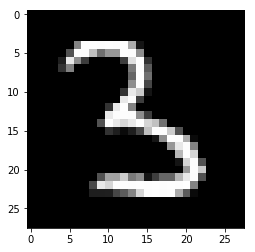

In [3]:
index = random.choice(range(50000))
img_array = mnist.train.images[index].reshape(28,28)*255
label = mnist.train.labels[index].argmax()
img = Image.fromarray(img_array.astype('float'))
print("This label is: ",label)
plt.imshow(img,cmap = 'binary')
plt.show()

## set hyper paramentes

In [4]:
learning_rate = 0.0056
iteration = 1500
batch_size = 128
print_step = 100

# setting layer
n_hidden_1 = 128
n_hidden_2 = 256 
n_hidden_3 = 64
num_input = 784 # MNIST 28*28
num_classes = 10 #0-9


X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

## buiild nn

In [5]:
# init w,b
w = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
b = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [6]:
def nn(x):
    l1 = tf.matmul(x,w['h1'])+b['b1']
    l2 = tf.nn.sigmoid(tf.matmul(l1,w['h2'])+b['b2'])
    l3 = tf.nn.sigmoid(tf.matmul(l2,w['h3'])+b['b3'])
    output = tf.matmul(l3,w['out'])+b['out']
    return output

In [7]:
output = nn(X)

# loss function softmax
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output,labels = Y))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss)

pred = tf.equal(tf.argmax(output,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(pred,tf.float32))

init = tf.global_variables_initializer()

## training

In [8]:
saver=tf.train.Saver(max_to_keep=1)
max_acc = 0
with tf.Session() as sess:
    sess.run(init)
    for i in range(1,iteration+1):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        sess.run(train,feed_dict={X: batch_x,Y: batch_y})

        if i % print_step ==0 or i == 1:
            los,acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("steps: "+str(i)+" loss: "+"{:.4f}".format(los) + " accuracy: "+ "{:.3f}".format(acc))
    print("Train Finished!")
    acc = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels})
    print("Testing Accuracy:", acc)
    if acc > max_acc:
        max_acc = acc
        saver.save(sess,'ckpt/mnist.ckpt')
        print("Saving model with: ", max_acc)
    sess.close()

steps: 1 loss: 7.7310 accuracy: 0.125
steps: 100 loss: 0.7585 accuracy: 0.789
steps: 200 loss: 0.6250 accuracy: 0.797
steps: 300 loss: 0.5021 accuracy: 0.867
steps: 400 loss: 0.4065 accuracy: 0.875
steps: 500 loss: 0.5458 accuracy: 0.828
steps: 600 loss: 0.5239 accuracy: 0.844
steps: 700 loss: 0.3073 accuracy: 0.891
steps: 800 loss: 0.4029 accuracy: 0.859
steps: 900 loss: 0.3709 accuracy: 0.867
steps: 1000 loss: 0.2564 accuracy: 0.898
steps: 1100 loss: 0.4579 accuracy: 0.898
steps: 1200 loss: 0.3340 accuracy: 0.922
steps: 1300 loss: 0.2360 accuracy: 0.938
steps: 1400 loss: 0.2744 accuracy: 0.930
steps: 1500 loss: 0.3052 accuracy: 0.922
Train Finished!
Testing Accuracy: 0.9059
Saving model with:  0.9059


## predict

In [9]:
sess = tf.Session()
saver.restore(sess,'ckpt/mnist.ckpt')

INFO:tensorflow:Restoring parameters from ckpt/mnist.ckpt


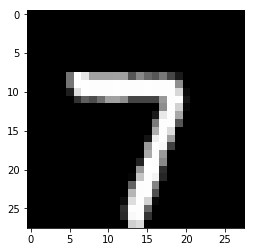

This label should be:  7


In [12]:
index = random.choice(range(mnist.test.images.shape[0]))
img_tensor = np.array([mnist.test.images[index]])
img_array = mnist.test.images[index].reshape(28,28)*255
img = Image.fromarray(img_array.astype('float'))
plt.imshow(img,cmap = 'binary')
plt.show()
res = output.eval(feed_dict={X: img_tensor}, session=sess)
print("This label should be: ",np.argmax(res))